# Étude d'accuracy des Classifiers
@Writer: Hoang Thuy Duong Vu

In [2]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Importation de la librairie seaborn:
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
# import sys
# sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Suppress a specific warning type
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
import os
from os import listdir
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Get the parent directory
os.chdir(parent_dir)  # Change the working directory to the parent directory
os.sys.path.append(parent_dir)  # Append the parent directory to the system path
listdir()

['Q3.ipynb',
 'side.ipynb',
 'main.ipynb',
 'Test',
 'fatigue_analysis.ipynb',
 'Sujet de test.pdf',
 'README.md',
 'classifier',
 'main copie.html',
 '.gitattributes',
 '.git',
 '.vscode',
 'test.ipynb']

### Chargement des données

In [5]:
# Load the data 
df = pd.read_json("Test/ergometer_500m.json")

In [6]:
# Calcul de la vitesse en km/h (distance en km / temps en heures)
df['split_time_hours'] = df['split_time'] / 3600  # Conversion du temps en heures
df['speed_kmh'] = (0.5 / df['split_time_hours'])  # La distance est de 0.5 km (500m)
df['speed_category'] = pd.cut(df['speed_kmh'], bins=[0, 13.5, 15, 20], labels=[0, 1, 2])

X = df[['split_calories','split_drag_factor','split_stroke_rate','split_stroke_count','split_time']]
y = df['speed_category']

X_noms = X.columns

In [7]:
df

,split_avg_pace,split_calories,split_distance,split_drag_factor,split_running_calories,split_running_distance,split_running_time,split_stroke_count,split_stroke_rate,split_time,split_type,participant,serial_number,calories,place,split_time_hours,speed_kmh,speed_category
0,1:59.4,33,500,120,33,500,119.4,56,28,119.4,distance_split,Eric,430839301,131,1,0.033167,15.075377,2
1,2:01.2,32,500,120,65,1000,240.6,53,26,121.2,distance_split,Eric,430839301,131,1,0.033667,14.851485,1
2,2:01.2,32,500,120,97,1500,361.8,54,27,121.2,distance_split,Eric,430839301,131,1,0.033667,14.851485,1
3,1:55.5,34,500,120,131,2000,477.3,56,29,115.5,distance_split,Eric,430839301,131,1,0.032083,15.584416,2
4,1:54.8,35,500,121,35,500,114.8,59,31,114.8,distance_split,Edouard,530398582,130,2,0.031889,15.679443,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2:11.0,30,500,117,119,2000,528.8,71,33,131.0,distance_split,Julie,530087901,119,3,0.036389,13.740458,1
124,2:07.2,31,500,131,31,500,127.2,56,26,127.2,distance_split,Hervé,530398582,119,4,0.035333,14.150943,1
125,2:13.4,29,500,115,60,1000,260.6,56,25,133.4,distance_split,Hervé,530398582,119,4,0.037056,13.493253,0
126,2:16.5,29,500,115,89,1500,397.1,61,27,136.5,distance_split,Hervé,530398582,119,4,0.037917,13.186813,0


In [8]:
X

,split_calories,split_drag_factor,split_stroke_rate,split_stroke_count,split_time
0,33,120,28,56,119.4
1,32,120,26,53,121.2
2,32,120,27,54,121.2
3,34,120,29,56,115.5
4,35,121,31,59,114.8
...,...,...,...,...,...
123,30,117,33,71,131.0
124,31,131,26,56,127.2
125,29,115,25,56,133.4
126,29,115,27,61,136.5


In [9]:
y

0      2
1      1
2      1
3      2
4      2
      ..
123    1
124    1
125    0
126    0
127    1
Name: speed_category, Length: 128, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [10]:
np.unique(y)

array([0, 1, 2])

# Expérimentations
## Préliminaire
Pour notre projet d'apprentissage supervisé, nous allons comparer entre les algorithmes suivant : 
* Les $k$ plus proches voisins,
* Le perceptron, avec la variante originale `ClassifierPerrceptron`,
* L'arbre de décision numérique

Afin d'assurer la conformité et la performance des algorithmes, les classifieurs `ClassifierKNN`et `ClassifierPerceptron` sont ajustés à une version plus convenable avec 10 labels allant de 0 à 9 de la base de labels `y`.

Pour la définition des variables constants, nous allons enregistrer : 
* Les noms des colonnes de la base principale `X` dans `X_noms`,
* La dimension d'une donnée de la base `X` dans `dim`,
* Le nombre des labels uniques de la base `y` dans `nb_labels`

Avant de commencer nos expérimentations, nous allons convertir les đeux bases `X` et `y` de type `DataFrame` en `np.ndarray`. 

Dans ce qui suit, les valeurs de 0 à 2 va représentent 3 catégories de vitesse, dont : 
- 0 : *"slow"*
- 1 : *"medium"*
- 2 : *"fast"*

Les expérimentations peuvent être visualiser ci-dessous : 

In [11]:
X = np.array(X)
y = np.array(y)

# Définition de variables
dim = len(X[0])
nb_labels = len(np.unique(y))

## Prétraitement de données

### Division de base de données

In [12]:
# -----
# Définition des données d'apprentissage (on reprend les données data_gauss générées plus haut)
np.random.seed(42)
(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X, y,25)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

import random

index = random.sample(range(len(X)),70)
data_cv, label_cv = X[index], y[index]

### Réduction de données 5D => 2D

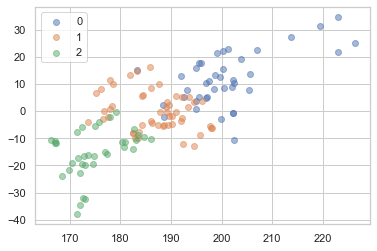

In [155]:
# A réaliser :

# 1) calcul des vecteurs propres
lam_train, V_train = np.linalg.eig(X.T @ X)
# lam_test, V_test = np.linalg.eig(XTu.T @ XTu)

# Trouver les indices des deux plus grandes valeurs propres
largest_indices = np.argsort(lam_train)[::-1][:2]



# Extraire les deux plus grandes valeurs propres et leurs vecteurs propres correspondants
largest_eigenvalues = lam_train[largest_indices]


max_train = V_train[:, largest_indices]
# max_test = V_test[:, np.argmax(lam_test)]


# 2) affichage (print)
#print("1er valeur rendue:\n", lam_train)
#print("2e valeur rendue :\n", V_train)

# 3) tri et sélection des 2 vecteurs associés aux 2 plus grandes valeurs propres 
#print("Vecteur train :\n", max_train)

# 4) affichage (plot) avec un code couleur pour les classes
for i in np.unique(y) :
  one_train = X[y==i]
  #print(one_train)

  projected_data_train = np.dot(one_train, max_train)

  plt.scatter(projected_data_train[:,0], projected_data_train[:,1],alpha=.5)


# ####################################
plt.legend(np.arange(10))

#plt.savefig("out/proj_usps_all.png",bbox_inches='tight', transparent=True,pad_inches=0)



À partir du graphe ci-dessus, on peut observer 3 groupes de labels distinctes, dont 0 en *blue*, 1 en *rouge*, et 3 en *vert*.

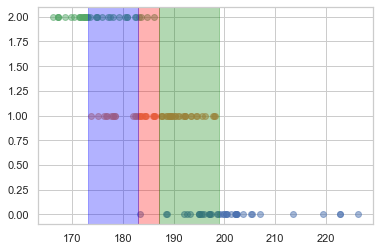

In [24]:
import math 
plt.figure()

lam, V = np.linalg.eig(X.T @ X)
max_eigenvalue_index = np.argmax(lam)
max_eigenvector = V[:, max_eigenvalue_index]

for i in range(10) : 
  data = X[y==i]
  projected_data = np.dot(data, max_eigenvector)
  plt.scatter(projected_data, [i for _ in range(len(projected_data))], alpha=0.5)

plt.axvspan(183, 187, color='red', alpha=0.3)
plt.axvspan(187, 199, color='green', alpha=0.3)
plt.axvspan(173, 183, color='blue', alpha=0.3)

À partir du graphe ci-dessus, la différence entre les chiffres est plus concrète que sur celui de 2D. On peut voit que : 
* Tous les chiffres se ressemblent quand les valeurs propres varient entre 183 et 187
* Les valeurs de 0 se ressemblent à ceux de 1 quand les valeurs propres varient entre 187 à 199
* Les valeurs de 1 se ressemblent à ceux de 2 quand les valeurs propres varient entre 173 à 183

## Algorithme de $k$ plus proches voisins

### Classification des 10 premiers exemples du dataset

In [27]:
np.random.seed(42)

# Création d'un knn avec k=1 et 16 dimensions pour les données
KNN = classif.ClassifierKNN(dim, 1)

KNN.train(data_train,label_train)

# Classification du dataset (contrôle de predict et score):
print("Classification des 10 premiers exemples du dataset:")

for i in range(0,10):
    print("\t{0:+.3f} {1:+.3f} : {2:+} ---> {3:+} [{4:+.5f}]".format(X[i,:][0], X[i,:][1], \
                                                                  y[i], \
                                                                  KNN.predict(X[i,:]), \
                                                                  KNN.score(X[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset train: ", KNN.accuracy(data_train,label_train))   
print("Taux de bonne classification sur le dataset test: ", KNN.accuracy(data_test,label_test))   


Classification des 10 premiers exemples du dataset:
	+33.000 +120.000 : +2 ---> +3 [+2.00000]
	+32.000 +120.000 : +1 ---> +2 [+1.00000]
	+32.000 +120.000 : +1 ---> +2 [+1.00000]
	+34.000 +120.000 : +2 ---> +3 [+2.00000]
	+35.000 +121.000 : +2 ---> +3 [+2.00000]
	+31.000 +120.000 : +1 ---> +2 [+1.00000]
	+31.000 +120.000 : +1 ---> +2 [+1.00000]
	+33.000 +120.000 : +2 ---> +3 [+2.00000]
	+33.000 +119.000 : +2 ---> +2 [+1.00000]
	+31.000 +119.000 : +1 ---> +2 [+1.00000]
Taux de bonne classification sur le dataset train:  0.0
Taux de bonne classification sur le dataset test:  0.03773584905660377


In [28]:
np.random.seed(42)

# Création d'un knn avec k=100 et 16 dimensions pour les données
KNN = classif.ClassifierKNN(dim, 100)

KNN.train(data_train,label_train)

# Classification du dataset (contrôle de predict et score):
print("Classification des 10 premiers exemples du dataset:")

for i in range(0,10):
    print("\t{0:+.3f} {1:+.3f} : {2:+} ---> {3:+} [{4:+.5f}]".format(X[i,:][0], X[i,:][1], \
                                                                  y[i], \
                                                                  KNN.predict(X[i,:]), \
                                                                  KNN.score(X[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset train: ", KNN.accuracy(data_train,label_train))   
print("Taux de bonne classification sur le dataset test: ", KNN.accuracy(data_test,label_test))   


Classification des 10 premiers exemples du dataset:
	+33.000 +120.000 : +2 ---> +1 [+0.00000]
	+32.000 +120.000 : +1 ---> +1 [+0.00000]
	+32.000 +120.000 : +1 ---> +1 [+0.00000]
	+34.000 +120.000 : +2 ---> +1 [+0.00000]
	+35.000 +121.000 : +2 ---> +1 [+0.00000]
	+31.000 +120.000 : +1 ---> +1 [+0.00000]
	+31.000 +120.000 : +1 ---> +1 [+0.00000]
	+33.000 +120.000 : +2 ---> +1 [+0.00000]
	+33.000 +119.000 : +2 ---> +1 [+0.00000]
	+31.000 +119.000 : +1 ---> +1 [+0.00000]
Taux de bonne classification sur le dataset train:  0.3333333333333333
Taux de bonne classification sur le dataset test:  0.5094339622641509


### Performances du modèle en fonction de $k$ en faisant varier $k$ de $1$ à $20$.

In [31]:
# on stocke les accuracies dans une liste :
accuracies = []

# seuil max des valeurs de k à regarder:
seuil_k = len(data_train)

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k+10,10)]

print("Liste des valeurs de  à tester :",valeurs_k)

for k in valeurs_k:
        
    KNN = classif.ClassifierKNN(dim,k)
    KNN.train(data_train, label_train)
    a = KNN.accuracy(data_test, label_test)
    accuracies.append(a)
    
# ---------------------------------------------
for i in range(0,len(valeurs_k)):
    print("Accuracy pour ",valeurs_k[i],":",accuracies[i])


Liste des valeurs de  à tester : [1, 11, 21, 31, 41, 51, 61, 71, 81]
Accuracy pour  1 : 0.03773584905660377
Accuracy pour  11 : 0.0
Accuracy pour  21 : 0.018867924528301886
Accuracy pour  31 : 0.03773584905660377
Accuracy pour  41 : 0.03773584905660377
Accuracy pour  51 : 0.07547169811320754
Accuracy pour  61 : 0.1509433962264151
Accuracy pour  71 : 0.22641509433962265
Accuracy pour  81 : 0.5094339622641509


### Accuracy en fonction de la valeur de $k$

À partir de la visualisation ci-dessous, on peut observer que plus la valeur de $k$ augmente, plus l'accuracy du classifieur incrémente dans le rang de $0.01$ à $0.509$.

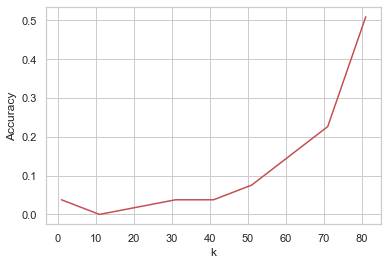

In [32]:
# Tracé de la variation de l'accuracy en fonction de la valeur de k:
# 
# Tracer de la courbe des variations
plt.plot(valeurs_k, accuracies, color='r')  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()


### Étude de la validation croisée

In [174]:
print("------ affichage validation croisée")

#################################

# ce qui se passe:
tic= time.time()
(res_all, res_moy, res_sd) = ev.validation_croisee(KNN, (data_cv, label_cv), 10)
toc= time.time()

print("------ fin affichage validation croisée")

print("Validation croisée sur ergometer :")
print("Perf obtenues : ",res_all)
print(f'Accuracy moyenne: {res_moy:0.3f}\técart type: {res_sd:0.4f}')
print(f'Résultat en {(toc-tic):0.4f} secondes.')

------ affichage validation croisée
Itération 0  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.14285714285714285
Itération 1  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.2857142857142857
Itération 2  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 3  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 4  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 5  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.2857142857142857
Itération 6  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 7  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 8  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 9  : taille base app.= 63  taille base test= 7 

## Perceptron de Rosenblatt

In [175]:
# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine pour tester

# -----
# Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
learning_rate = 0.01
perceptron = classif.ClassifierPerceptron(dim,learning_rate=learning_rate)

### Initialisation aléatoire et convergence

Nb iterations:  1000


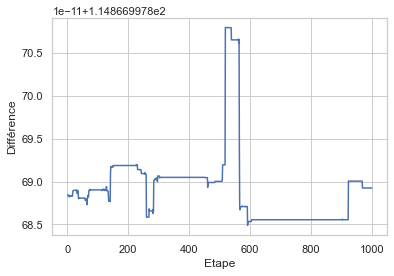

Les variations : [114.86699777568839, 114.8669977756884, 114.86699777568843, 114.86699777568842, 114.86699777568829, 114.86699777568822, 114.86699777568822, 114.86699777568825, 114.86699777568835, 114.86699777568833, 114.86699777568829, 114.86699777568829, 114.86699777568829, 114.86699777568829, 114.86699777568828, 114.86699777568829, 114.86699777568828, 114.86699777568872, 114.86699777568893, 114.86699777568896, 114.86699777568896, 114.86699777568896, 114.86699777568896, 114.86699777568896, 114.86699777568896, 114.86699777568896, 114.86699777568896, 114.86699777568896, 114.86699777568896, 114.86699777568894, 114.866997775689, 114.86699777568899, 114.86699777568859, 114.86699777568893, 114.86699777568893, 114.86699777568855, 114.86699777568798, 114.86699777568808, 114.86699777568805, 114.86699777568805, 114.86699777568805, 114.86699777568805, 114.86699777568805, 114.86699777568805, 114.86699777568805, 114.86699777568805, 114.86699777568805, 114.86699777568805, 114.86699777568805, 114.8

In [183]:
# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine

# Création d'un perceptron avec initialisation aléatoire et le learning_rate ci-dessous:
learning_rate = 0.01
perceptron = classif.ClassifierPerceptron(dim, learning_rate=learning_rate, init=True)

# Apprentissage du perceptron
les_variations = perceptron.train(data_train,label_train,nb_max=1000)
print("Nb iterations: ", len(les_variations))


# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

L_test = perceptron.train(data_test, label_test)
print("Les variations :", les_variations)
print("Accuracy finale (train): ", perceptron.accuracy(data_train, label_train))
print("Accuracy finale (test) : ", perceptron.accuracy(data_test, label_test))

### Impact du learning rate

Pour $\alpha=0.1$ : 

Nb iterations:  1000


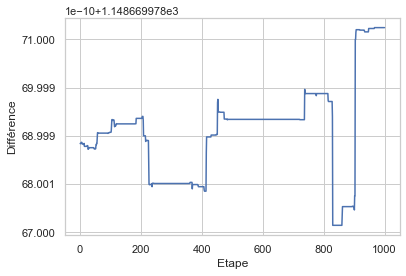

Les variations : [1148.669977756884, 1148.6699777568838, 1148.6699777568838, 1148.6699777568856, 1148.6699777568865, 1148.6699777568865, 1148.6699777568856, 1148.6699777568829, 1148.669977756883, 1148.669977756883, 1148.669977756883, 1148.6699777568822, 1148.669977756882, 1148.6699777568842, 1148.669977756878, 1148.669977756878, 1148.669977756878, 1148.669977756878, 1148.669977756878, 1148.669977756878, 1148.669977756878, 1148.669977756878, 1148.6699777568783, 1148.6699777568797, 1148.6699777568797, 1148.6699777568792, 1148.669977756872, 1148.6699777568724, 1148.669977756875, 1148.6699777568756, 1148.6699777568751, 1148.6699777568754, 1148.6699777568754, 1148.6699777568754, 1148.6699777568754, 1148.6699777568754, 1148.6699777568754, 1148.6699777568754, 1148.6699777568754, 1148.6699777568754, 1148.6699777568754, 1148.6699777568754, 1148.6699777568754, 1148.6699777568754, 1148.6699777568754, 1148.6699777568751, 1148.669977756873, 1148.6699777568726, 1148.6699777568726, 1148.6699777568726

In [184]:
# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine

# Création d'un perceptron avec initialisation aléatoire et le learning_rate ci-dessous:
learning_rate = 0.1
perceptron = classif.ClassifierPerceptron(dim, learning_rate=learning_rate, init=True)

# Apprentissage du perceptron
les_variations = perceptron.train(data_train,label_train,nb_max=1000)
print("Nb iterations: ", len(les_variations))


# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

L_test = perceptron.train(data_test, label_test)
print("Les variations :", les_variations)
print("Accuracy finale (train): ", perceptron.accuracy(data_train, label_train))
print("Accuracy finale (test) : ", perceptron.accuracy(data_test, label_test))

Pour $\alpha=0.001$ : 

Nb iterations:  1000


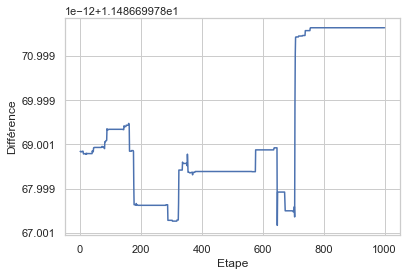

Accuracy finale (train):  0.3333333333333333
Accuracy finale (test) :  0.5094339622641509


In [185]:
# Par exemple : 

# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine

# Création d'un perceptron avec initialisation aléatoire et le learning_rate ci-dessous:
learning_rate = 0.001
perceptron = classif.ClassifierPerceptron(dim, learning_rate=learning_rate, init=True)

# Apprentissage du perceptron
les_variations = perceptron.train(data_train,label_train,nb_max=1000,seuil=1E-6)
print("Nb iterations: ", len(les_variations))

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

print("Accuracy finale (train): ", perceptron.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron.accuracy(data_test,label_test) )


### Étude de la validation croisée

In [186]:
print("------ affichage validation croisée")

#################################

# ce qui se passe:
tic= time.time()
(res_all, res_moy, res_sd) = ev.validation_croisee(perceptron, (data_cv, label_cv), 10)
toc= time.time()

print("------ fin affichage validation croisée")

print("Validation croisée sur pen_dataset :")
print("Perf obtenues : ",res_all)
print(f'Accuracy moyenne: {res_moy:0.3f}\técart type: {res_sd:0.4f}')
print(f'Résultat en {(toc-tic):0.4f} secondes.')

------ affichage validation croisée
Itération 0  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.2857142857142857
Itération 1  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.2857142857142857
Itération 2  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 3  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 4  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.0
Itération 5  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.2857142857142857
Itération 6  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 7  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 8  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 9  : taille base app.= 63  taille base test= 7  Taux de bonne cl

## Arbre de décision 

In [191]:
import graphviz as gv

### Premier essai avec un seuil d'entropie bas

Cet arbre possède  4  feuilles.


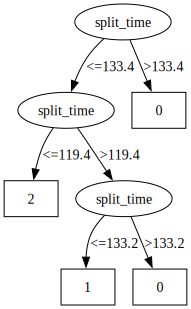

In [192]:
# Initialiation d'un arbre pour le dataset Iris:
arbre = classif.ClassifierArbreNumerique(dim, 0.0, X_noms)

# Construction de l'arbre de décision à partir du dataset Iris
arbre.train(X,y)

# Construction de la représentation graphique (affichage)
graphe_arbre = gv.Digraph(format='png')
arbre.affiche(graphe_arbre)

# Affichage du graphe obtenu:
print("Cet arbre possède ",arbre.number_leaves()," feuilles.")
graphe_arbre


In [193]:
# mesure du taux de bonne classification
arbre.accuracy(data_test,label_test)
print("Accuracy finale (train): ", arbre.accuracy(data_train,label_train))
print("Accuracy finale (test) : ", arbre.accuracy(data_test,label_test))

Accuracy finale (train):  1.0
Accuracy finale (test) :  1.0


Cet arbre possède  2  feuilles.


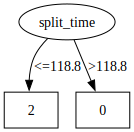

In [194]:
# Initialiation d'un arbre pour le dataset Iris:
arbre = classif.ClassifierArbreNumerique(dim, 0.75, X_noms)

# Construction de l'arbre de décision à partir du dataset Iris
arbre.train(data_train,label_train)

# Construction de la représentation graphique (affichage)
graphe_arbre = gv.Digraph(format='png')
arbre.affiche(graphe_arbre)

# Affichage du graphe obtenu:
print("Cet arbre possède ",arbre.number_leaves()," feuilles.")
graphe_arbre


In [195]:
# mesure du taux de bonne classification
arbre.accuracy(data_test,label_test)
print("Accuracy finale (train): ", arbre.accuracy(data_train,label_train))
print("Accuracy finale (test) : ", arbre.accuracy(data_test,label_test))

Accuracy finale (train):  0.6533333333333333
Accuracy finale (test) :  0.4528301886792453


Après les tests ci-dessus, on trouve que la variation de l'entropie possède un impact trivial sur l'accuracy du classifieur : en posant l'entropie à $0.0$, on obtient la meilleure accuracy de $100%$ pour la base d'apprentissage et $100$ pour la base de test, tandis que pour l'entropie à $0.75$, l'accuracy de la base d'apprentissage chute à $65.(33)%$ et $45.28%$ pour la base de test.
 
En plus simple terme, plus on divise concrètement les cas, plus on obtient une bonne accuracy pour le classifieur.

### Étude de la validation croisée

In [196]:
# ################### A COMPLETER 
arbre = classif.ClassifierArbreNumerique(dim, 0.0, X_noms)
tic= time.time()
(res_all, res_moy, res_sd) = ev.validation_croisee(arbre, (data_cv, label_cv), 10)
toc= time.time()
# ################### 
       
print("\nValidation croisée sur les iris avec comme seuil ",0.0)
print("Perf obtenues : ",res_all)
print(f'\nAccuracy moyenne: {res_moy:.3f}\técart type: {res_sd:.3f}')

Itération 0  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 1.0
Itération 1  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 1.0
Itération 2  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.8571428571428571
Itération 3  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 1.0
Itération 4  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 1.0
Itération 5  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.8571428571428571
Itération 6  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 1.0
Itération 7  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.8571428571428571
Itération 8  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 1.0
Itération 9  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 1.0

Validation croisée sur les iris avec comme seuil  0.0
Perf obtenues :  [1.0, 1.0, 0.8571428571428571, 1.

In [197]:
array = np.arange(0, 1.111, 0.101)
for i in range(len(array)) : 
  arbre = classif.ClassifierArbreNumerique(dim, array[i], X_noms)
  (res_all, res_moy, res_sd) = ev.validation_croisee(arbre, (data_cv, label_cv), 10, verbose=False)
  print("run ",i,": seuil d'entropie =",array[i],"        accyracy moyenne: ",res_moy,"       écart type: ",res_sd)


run  0 : seuil d'entropie = 0.0         accyracy moyenne:  0.9571428571428571        écart type:  0.06546536707079774
run  1 : seuil d'entropie = 0.101         accyracy moyenne:  0.9571428571428571        écart type:  0.06546536707079774
run  2 : seuil d'entropie = 0.202         accyracy moyenne:  0.9571428571428571        écart type:  0.06546536707079774
run  3 : seuil d'entropie = 0.30300000000000005         accyracy moyenne:  0.9571428571428571        écart type:  0.06546536707079774
run  4 : seuil d'entropie = 0.404         accyracy moyenne:  0.9571428571428571        écart type:  0.06546536707079774
run  5 : seuil d'entropie = 0.505         accyracy moyenne:  0.9571428571428571        écart type:  0.06546536707079774
run  6 : seuil d'entropie = 0.6060000000000001         accyracy moyenne:  0.9571428571428571        écart type:  0.06546536707079774
run  7 : seuil d'entropie = 0.7070000000000001         accyracy moyenne:  0.8714285714285716        écart type:  0.19639610121239315
ru

In [198]:
df_res = pd.DataFrame(columns=['Entropie', 'Accuracy'])

# ################### A COMPLETER 
entropie = []
acc = []
for i in range(len(array)) : 
  arbre = classif.ClassifierArbreNumerique(dim, array[i], X_noms)
  (res_all, res_moy, res_sd) = ev.validation_croisee(arbre, (data_cv, label_cv), 10, verbose=False)
  for j in range(len(res_all)) : 
    entropie.append(array[i])
    acc.append(res_all[j])

df_res["Entropie"] = entropie
df_res["Accuracy"] = acc

print("Entropie max accuracy:",df_res['Entropie'][np.argmax(df_res['Accuracy'])])
# ################### 
# Le datataframe obtenu :
df_res

Entropie max accuracy: 0.0


,Entropie,Accuracy
0,0.00,1.000000
1,0.00,1.000000
2,0.00,0.857143
3,0.00,1.000000
4,0.00,1.000000
...,...,...
105,1.01,0.142857
106,1.01,0.428571
107,1.01,0.428571
108,1.01,0.428571


<Axes: xlabel='Entropie', ylabel='Accuracy'>

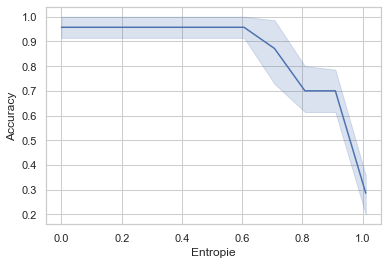

In [199]:
# Tracé avec lineplot
sns.lineplot(x="Entropie", y="Accuracy", data=df_res)

D'après la courbe ci-dessus, on trouve que plus l'entropie augmente, moins bon est la valeur de l'accuracy, qui chute de près de $0.95$ à moins de $0.3$ quand la valeur de l'entropie incrémente de $0.0$ à $1.0$.

## Résumé

In [18]:
arbre = classif.ClassifierArbreNumerique(dim, 0.0, X_noms)
arbre.train(data_train,label_train)

predicted_categories = [arbre.predict(data_test[i]) for i in range(len(data_test))]

In [20]:
X_noms

Index(['split_calories', 'split_drag_factor', 'split_stroke_rate',
       'split_stroke_count', 'split_time'],
      dtype='object')

In [33]:
X_noms

Index(['split_calories', 'split_drag_factor', 'split_stroke_rate',
       'split_stroke_count', 'split_time'],
      dtype='object')

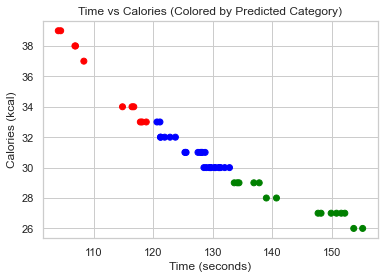

In [50]:
color_map = {2: 'red', 1: 'blue', 0: 'green'}
colors = [color_map[cat] for cat in predicted_categories]  # Map categories to colors

plt.scatter(data_test[:,4], data_test[:,0], c=colors)

plt.title('Time vs Calories (Colored by Predicted Category)')
plt.xlabel('Time (seconds)')
plt.ylabel('Calories (kcal)')
plt.show()

Après l'étude des trois différents classifieurs, on obtient les résultats suivants  :

||$k$ plus proches voisins|Perceptron|Arbre de décision numérique|
|-|-|-|-|
|Training set|$33.33$|$33.33$|$100$|
|Cross Validation|$38.6 - 0.116$|$35.7 - 0.1464$|$95.7 - 0.065$|
|Test set|$50.94$|$50.94$|$100$|

En partant du tableau ci-dessus, on trouve que l'arbre de décision est le meilleur classifieur, avec l'accuracy moyenne à $95.7$ et la variance la plus basse à $0.065$. De plus, l'accuracy du classifieur en appliquant sur les bases de données d'apprentissage et de test restent $100%$. 

---